In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps
import scipy.ndimage as ndi
import cv2
import os
#import imageio

In [ ]:
#currentDirectory = os.getcwd()
#print(currentDirectory)

In [2]:
dirname = '/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia'


train_path = os.path.join(dirname, 'chest_xray/train')
train_nrml_path = os.path.join(train_path, 'NORMAL')
train_pnm_path = os.path.join(train_path, 'PNEUMONIA')

test_path = os.path.join(dirname, 'chest_xray/test')
test_nrml_path = os.path.join(test_path, 'NORMAL')
test_pnm_path = os.path.join(test_path, 'PNEUMONIA')

val_path = os.path.join(dirname, 'chest_xray/val')
val_nrml_path = os.path.join(val_path, 'NORMAL')
val_pnm_path = os.path.join(val_path, 'PNEUMONIA')

In [3]:
def plot_imgs(image_dir, num_imgs=25):
    all_item_dirs = os.listdir(image_dir)
    item_files = [os.path.join(image_dir, file) for file in all_item_dirs][:num_imgs]
    
    plt.figure(figsize = (10, 10))
    
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
        
        img = plt.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        
    plt.tight_layout()

Normal image

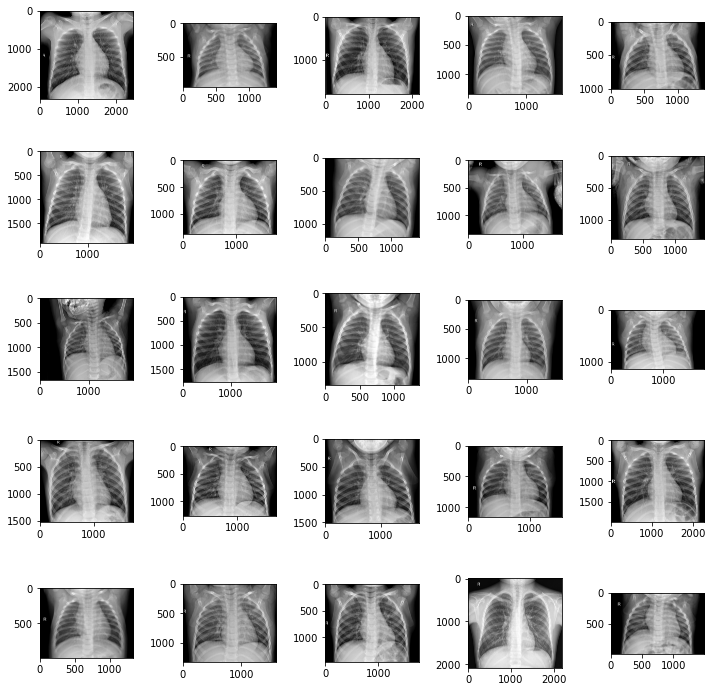

In [4]:
plot_imgs(train_nrml_path)

Pneumonia image

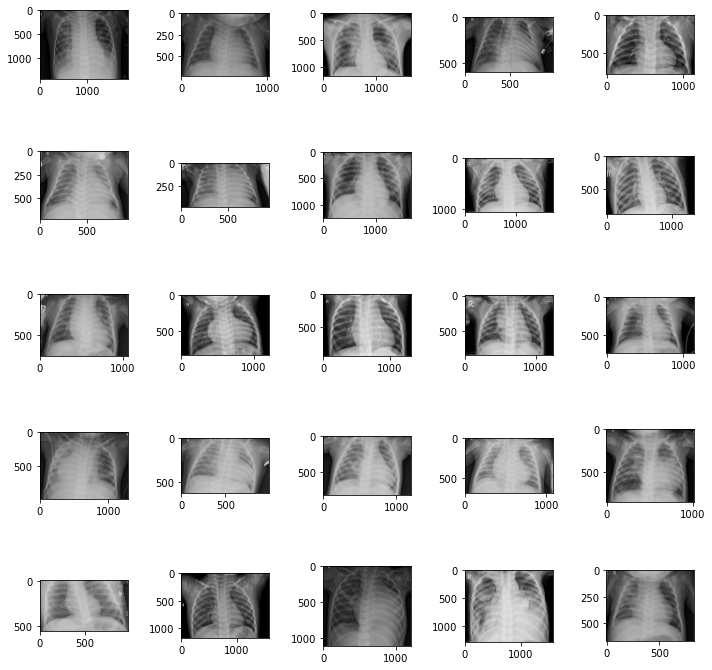

In [5]:
plot_imgs(train_pnm_path)

In [6]:
def plot_img_hist(item_dir, num_img=6):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:num_img]
    
    for idx, img_path in enumerate(item_files):
        fig1 = plt.figure(idx, figsize=(10, 10))
        fig1.add_subplot(2, 2, 1)
        img = mpimg.imread(img_path, )
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        fig1.add_subplot(2, 2, 2)
        plt.hist(img.ravel(), bins=256, fc='k', ec='k')
        
    plt.tight_layout()

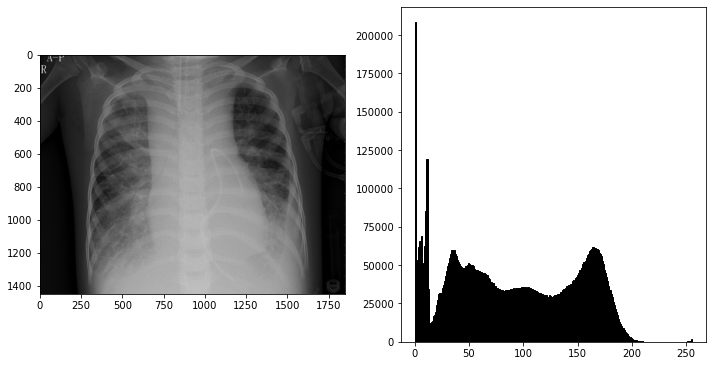

In [8]:
plot_img_hist(train_pnm_path, 1)

Resizing

In [9]:
dirname_work = '/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia'
dir_chest_xray = os.path.join('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia', 'chest_xray2')

os.mkdir('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia/chest_xray2/')
os.mkdir('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia/chest_xray2/train')
os.mkdir('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia/chest_xray2/train/NORMAL')
os.mkdir('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia/chest_xray2/train/PNEUMONIA')
train_path_work = os.path.join(dir_chest_xray, 'train')
train_nrml_pth_work = os.path.join(train_path_work, 'NORMAL')
train_pnm_pth_work = os.path.join(train_path_work, 'PNEUMONIA')


os.mkdir('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia/chest_xray2/test')
os.mkdir('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia/chest_xray2/test/NORMAL')
os.mkdir('/home/chamath/Documents/PyProjects/Chest X-Ray pneumonia/chest_xray2/test/PNEUMONIA')
test_path_work = os.path.join(dir_chest_xray, 'test')
test_nrml_pth_work = os.path.join(test_path_work, 'NORMAL')
test_pnm_pth_work = os.path.join(test_path_work, 'PNEUMONIA')

In [10]:
def img_resizing(path_from, path_to, height=500, width=500):
    size = height, width
    i = 1
    files = os.listdir(path_from)
    
    for file in files:
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = ps.path.join(path_to, file)
            img = Image.open(file_dir)
            img = img.resize(size. Image.ANTIALIAS)
            img = img.convert('RGB')
            img.save(file_dir_save)
            i = i + 1
        except:
            continue

In [11]:
img_resizing(train_nrml_path, train_nrml_pth_work, 300, 300)

In [12]:
img_resizing(train_pnm_path, train_pnm_pth_work, 300, 300)

In [13]:
img_resizing(test_nrml_path, test_nrml_pth_work, 300, 300)
img_resizing(test_pnm_path, test_pnm_pth_work, 300, 300)

In [14]:
plot_imgs(train_nrml_pth_work)

<Figure size 720x720 with 0 Axes>

In [15]:
def  hist_equal(path_from, path_to):
    i=1
    files = os.listdir(path_from)
    for file in files: 
        try:
            file_dir = os.path.join(path_from, file)
            file_dir_save = os.path.join(path_to, file)
            img = Image.open(file_dir)
            img = ImageOps.equalize(img)
            #img = img.convert("RGB") #konwersja z RGBA do RGB, usuniecie kanału alfa zeby zapisać do jpg
            img.save(file_dir_save) 
            i=i+1
        except:
            continue

In [16]:
hist_equal(train_pnm_pth_work, train_pnm_pth_work)
hist_equal(train_nrml_pth_work, train_nrml_pth_work)

hist_equal(test_pnm_pth_work, test_pnm_pth_work)
hist_equal(test_nrml_pth_work, test_nrml_pth_work)

In [17]:
plot_img_hist(train_pnm_pth_work, 2)

<Figure size 432x288 with 0 Axes>